# Análisis Exploratorio de Datos COVID-19

Este notebook explora los archivos CSV en la carpeta `data/` para entender:
1. **Tipo de datos**: ¿Personas, provincias, países?
2. **Estructura temporal**: ¿Series de tiempo o datos puntuales?
3. **Variables disponibles**: ¿Qué métricas tenemos?
4. **Cobertura geográfica**: ¿Qué regiones están incluidas?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 Librerías cargadas correctamente")
print("🔍 Explorando archivos en la carpeta data/...")


📊 Librerías cargadas correctamente
🔍 Explorando archivos en la carpeta data/...


In [2]:
# Listar todos los archivos CSV en la carpeta data/
data_folder = "data/"
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

print(f"📁 Encontrados {len(csv_files)} archivos CSV:")
for i, file in enumerate(csv_files, 1):
    file_path = os.path.join(data_folder, file)
    file_size = os.path.getsize(file_path) / 1024  # KB
    print(f"{i}. {file} ({file_size:.1f} KB)")

print(f"\n🔍 Analizando estructura de cada archivo...")


📁 Encontrados 6 archivos CSV:
1. time_series_covid_19_confirmed_US.csv (6443.1 KB)
2. time_series_covid_19_recovered.csv (570.7 KB)
3. time_series_covid_19_deaths_US.csv (4478.6 KB)
4. covid_19_data.csv (22007.1 KB)
5. time_series_covid_19_deaths.csv (438.4 KB)
6. time_series_covid_19_confirmed.csv (632.6 KB)

🔍 Analizando estructura de cada archivo...


In [3]:
# Función para analizar la estructura de un archivo CSV
def analyze_csv_structure(file_path, file_name):
    print(f"\n{'='*60}")
    print(f"📄 ANALIZANDO: {file_name}")
    print(f"{'='*60}")
    
    try:
        # Cargar solo las primeras filas para análisis rápido
        df = pd.read_csv(file_path, nrows=1000)
        
        print(f"📊 Dimensiones: {df.shape[0]} filas (muestra), {df.shape[1]} columnas")
        print(f"📅 Columnas disponibles:")
        
        # Analizar columnas
        date_columns = []
        numeric_columns = []
        categorical_columns = []
        
        for col in df.columns:
            if any(date_word in col.lower() for date_word in ['date', 'fecha', 'time']):
                date_columns.append(col)
            elif df[col].dtype in ['int64', 'float64']:
                numeric_columns.append(col)
            else:
                categorical_columns.append(col)
        
        print(f"  📅 Columnas de fecha: {date_columns}")
        print(f"  🔢 Columnas numéricas: {numeric_columns[:5]}{'...' if len(numeric_columns) > 5 else ''}")
        print(f"  📝 Columnas categóricas: {categorical_columns}")
        
        # Detectar si es serie temporal
        has_time_series = len(date_columns) > 0 or any('time' in col.lower() for col in df.columns)
        
        # Detectar tipo de datos geográficos
        geo_indicators = []
        for col in df.columns:
            if any(geo_word in col.lower() for geo_word in ['country', 'state', 'province', 'region', 'pais', 'provincia', 'estado']):
                geo_indicators.append(col)
        
        print(f"\n🌍 Indicadores geográficos: {geo_indicators}")
        print(f"⏰ ¿Es serie temporal?: {'SÍ' if has_time_series else 'NO'}")
        
        # Mostrar primeras filas
        print(f"\n📋 Primeras 3 filas:")
        print(df.head(3).to_string())
        
        return {
            'file_name': file_name,
            'shape': df.shape,
            'date_columns': date_columns,
            'numeric_columns': numeric_columns,
            'categorical_columns': categorical_columns,
            'geo_indicators': geo_indicators,
            'is_time_series': has_time_series,
            'sample_data': df.head(3)
        }
        
    except Exception as e:
        print(f"❌ Error al leer {file_name}: {str(e)}")
        return None

# Analizar todos los archivos
analysis_results = []
for file in csv_files:
    file_path = os.path.join(data_folder, file)
    result = analyze_csv_structure(file_path, file)
    if result:
        analysis_results.append(result)



📄 ANALIZANDO: time_series_covid_19_confirmed_US.csv
📊 Dimensiones: 1000 filas (muestra), 505 columnas
📅 Columnas disponibles:
  📅 Columnas de fecha: []
  🔢 Columnas numéricas: ['UID', 'code3', 'FIPS', 'Lat', 'Long_']...
  📝 Columnas categóricas: ['iso2', 'iso3', 'Admin2', 'Province_State', 'Country_Region', 'Combined_Key']

🌍 Indicadores geográficos: ['Province_State', 'Country_Region']
⏰ ¿Es serie temporal?: NO

📋 Primeras 3 filas:
        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region        Lat      Long_          Combined_Key  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  

In [4]:
# Resumen de análisis
print(f"\n{'='*80}")
print(f"📊 RESUMEN DEL ANÁLISIS")
print(f"{'='*80}")

# Crear DataFrame de resumen
summary_data = []
for result in analysis_results:
    summary_data.append({
        'Archivo': result['file_name'],
        'Filas (muestra)': result['shape'][0],
        'Columnas': result['shape'][1],
        'Serie Temporal': 'SÍ' if result['is_time_series'] else 'NO',
        'Indicadores Geo': len(result['geo_indicators']),
        'Columnas Numéricas': len(result['numeric_columns']),
        'Tipo de Datos': 'Geográfico' if len(result['geo_indicators']) > 0 else 'Otro'
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Clasificar archivos por tipo
time_series_files = [r for r in analysis_results if r['is_time_series']]
geo_files = [r for r in analysis_results if len(r['geo_indicators']) > 0]

print(f"\n🔍 CLASIFICACIÓN:")
print(f"📈 Archivos de series temporales: {len(time_series_files)}")
for f in time_series_files:
    print(f"  - {f['file_name']}")

print(f"\n🌍 Archivos con datos geográficos: {len(geo_files)}")
for f in geo_files:
    print(f"  - {f['file_name']}")



📊 RESUMEN DEL ANÁLISIS
                              Archivo  Filas (muestra)  Columnas Serie Temporal  Indicadores Geo  Columnas Numéricas Tipo de Datos
time_series_covid_19_confirmed_US.csv             1000       505             NO                2                 499    Geográfico
   time_series_covid_19_recovered.csv              261       498             NO                2                 496    Geográfico
   time_series_covid_19_deaths_US.csv             1000       506             NO                2                 500    Geográfico
                    covid_19_data.csv             1000         8             SÍ                2                   4    Geográfico
      time_series_covid_19_deaths.csv              276       498             NO                2                 496    Geográfico
   time_series_covid_19_confirmed.csv              276       498             NO                2                 496    Geográfico

🔍 CLASIFICACIÓN:
📈 Archivos de series temporales: 1
  - co

In [5]:
# Visualizaciones específicas para archivos de series temporales
if time_series_files:
    print(f"\n{'='*60}")
    print(f"📈 ANÁLISIS DETALLADO DE SERIES TEMPORALES")
    print(f"{'='*60}")
    
    for result in time_series_files:
        print(f"\n🔍 Analizando: {result['file_name']}")
        
        # Cargar archivo completo para análisis temporal
        try:
            df_full = pd.read_csv(os.path.join(data_folder, result['file_name']))
            print(f"📊 Dimensiones completas: {df_full.shape}")
            
            # Detectar columnas de fecha
            date_cols = [col for col in df_full.columns if any(x in col.lower() for x in ['date', 'fecha'])]
            if not date_cols:
                # Buscar columnas que parezcan fechas (formato MM/DD/YY)
                date_cols = [col for col in df_full.columns if '/' in str(df_full[col].iloc[0])]
            
            print(f"📅 Columnas de fecha detectadas: {date_cols}")
            
            # Analizar cobertura temporal
            if date_cols:
                print(f"📆 Rango temporal:")
                for col in date_cols[:2]:  # Solo primeras 2 columnas de fecha
                    try:
                        dates = pd.to_datetime(df_full[col], errors='coerce')
                        print(f"  {col}: {dates.min()} a {dates.max()}")
                    except:
                        print(f"  {col}: No se pudo parsear como fecha")
            
            # Mostrar estadísticas de columnas numéricas
            numeric_cols = result['numeric_columns'][:5]  # Primeras 5
            if numeric_cols:
                print(f"📊 Estadísticas de columnas numéricas:")
                for col in numeric_cols:
                    if col in df_full.columns:
                        print(f"  {col}: min={df_full[col].min():.0f}, max={df_full[col].max():.0f}, mean={df_full[col].mean():.1f}")
            
        except Exception as e:
            print(f"❌ Error al analizar {result['file_name']}: {str(e)}")



📈 ANÁLISIS DETALLADO DE SERIES TEMPORALES

🔍 Analizando: covid_19_data.csv
📊 Dimensiones completas: (306429, 8)
📅 Columnas de fecha detectadas: ['ObservationDate', 'Last Update']
📆 Rango temporal:
  ObservationDate: 2020-01-22 00:00:00 a 2021-05-29 00:00:00
  Last Update: 2020-01-22 17:00:00 a 2020-02-01 19:53:00
📊 Estadísticas de columnas numéricas:
  SNo: min=1, max=306429, mean=153215.0
  Confirmed: min=-302844, max=5863138, mean=85670.9
  Deaths: min=-178, max=112385, mean=2036.4
  Recovered: min=-854405, max=6399531, mean=50420.3


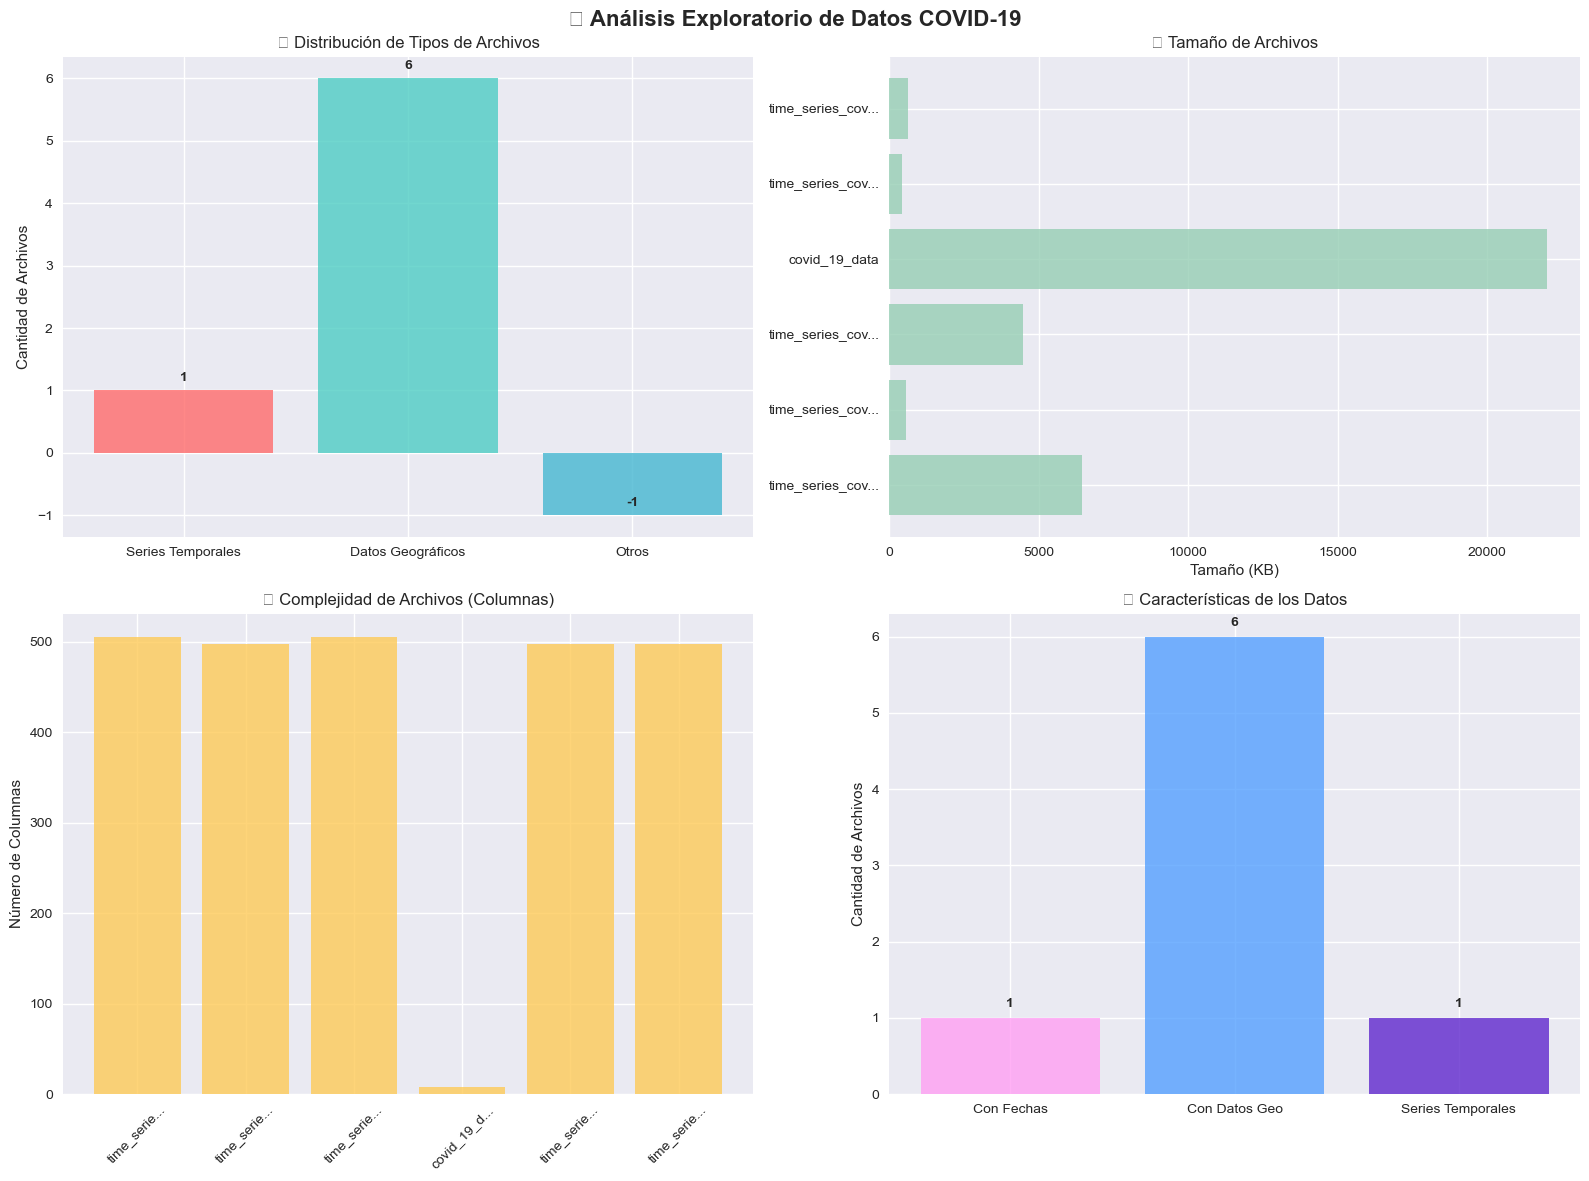


✅ Análisis completado! Se han identificado 6 archivos CSV.
📈 1 archivos contienen series temporales
🌍 6 archivos contienen datos geográficos


In [7]:
# Crear visualizaciones para entender mejor los datos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Análisis Exploratorio de Datos COVID-19', fontsize=16, fontweight='bold')

# Gráfico 1: Distribución de tipos de archivos
ax1 = axes[0, 0]
file_types = ['Series Temporales', 'Datos Geográficos', 'Otros']
counts = [len(time_series_files), len(geo_files), len(analysis_results) - len(time_series_files) - len(geo_files)]
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']
bars = ax1.bar(file_types, counts, color=colors, alpha=0.8)
ax1.set_title('📁 Distribución de Tipos de Archivos')
ax1.set_ylabel('Cantidad de Archivos')
for bar, count in zip(bars, counts):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(count), ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Tamaño de archivos
ax2 = axes[0, 1]
file_sizes = []
file_names = []
for file in csv_files:
    file_path = os.path.join(data_folder, file)
    size_kb = os.path.getsize(file_path) / 1024
    file_sizes.append(size_kb)
    file_names.append(file.replace('.csv', ''))

bars2 = ax2.barh(range(len(file_names)), file_sizes, color='#96ceb4', alpha=0.8)
ax2.set_yticks(range(len(file_names)))
ax2.set_yticklabels([name[:15] + '...' if len(name) > 15 else name for name in file_names])
ax2.set_xlabel('Tamaño (KB)')
ax2.set_title('📏 Tamaño de Archivos')

# Gráfico 3: Número de columnas por archivo
ax3 = axes[1, 0]
column_counts = [result['shape'][1] for result in analysis_results]
file_names_short = [result['file_name'].replace('.csv', '') for result in analysis_results]
bars3 = ax3.bar(range(len(file_names_short)), column_counts, color='#feca57', alpha=0.8)
ax3.set_xticks(range(len(file_names_short)))
ax3.set_xticklabels([name[:10] + '...' if len(name) > 10 else name for name in file_names_short], rotation=45)
ax3.set_ylabel('Número de Columnas')
ax3.set_title('📊 Complejidad de Archivos (Columnas)')

# Gráfico 4: Resumen de características
ax4 = axes[1, 1]
features = ['Con Fechas', 'Con Datos Geo', 'Series Temporales']
feature_counts = [
    sum(1 for r in analysis_results if len(r['date_columns']) > 0),
    sum(1 for r in analysis_results if len(r['geo_indicators']) > 0),
    sum(1 for r in analysis_results if r['is_time_series'])
]
colors4 = ['#ff9ff3', '#54a0ff', '#5f27cd']
bars4 = ax4.bar(features, feature_counts, color=colors4, alpha=0.8)
ax4.set_title('🔍 Características de los Datos')
ax4.set_ylabel('Cantidad de Archivos')
for bar, count in zip(bars4, feature_counts):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ Análisis completado! Se han identificado {len(analysis_results)} archivos CSV.")
print(f"📈 {len(time_series_files)} archivos contienen series temporales")
print(f"🌍 {len(geo_files)} archivos contienen datos geográficos")



📈 VISUALIZACIONES DE SERIES TEMPORALES

🔍 Procesando: covid_19_data.csv
📊 Cargados 306429 filas y 8 columnas
📅 Columnas de fecha detectadas: 0
❌ No se detectaron columnas de fecha en covid_19_data.csv


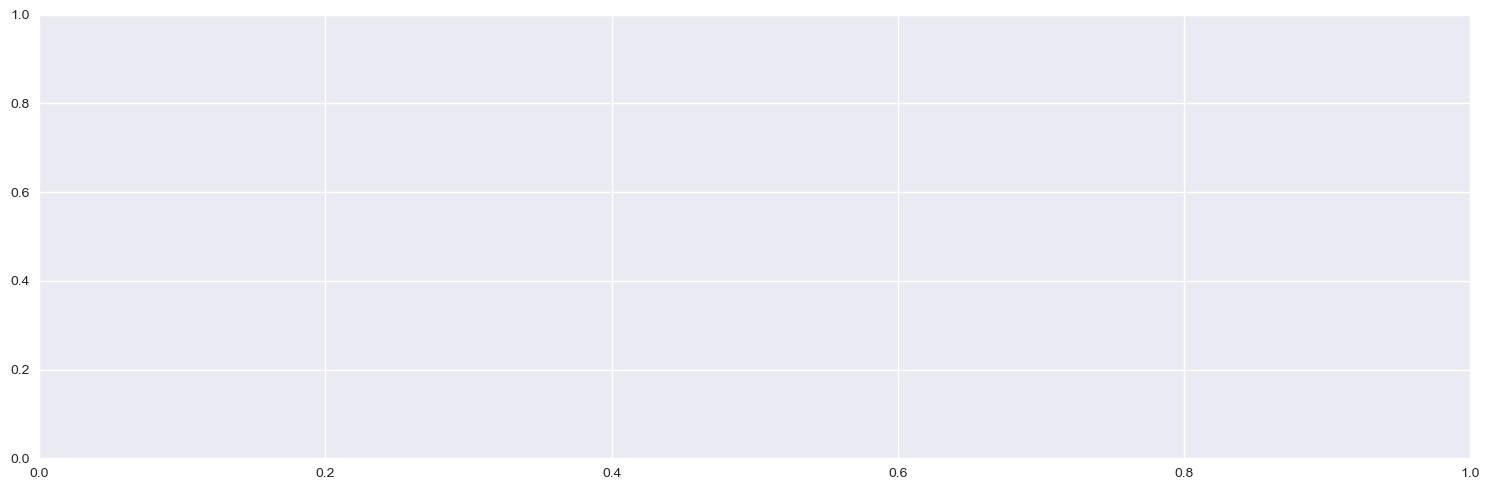


🎯 CONCLUSIÓN DEL ANÁLISIS:
📁 Total de archivos analizados: 6
📈 Archivos con series temporales: 1
🌍 Archivos con datos geográficos: 6
📊 Archivos con datos numéricos: 6


In [8]:
# Análisis específico de archivos de series temporales con visualizaciones
if time_series_files:
    print(f"\n{'='*80}")
    print(f"📈 VISUALIZACIONES DE SERIES TEMPORALES")
    print(f"{'='*80}")
    
    # Crear subplots para cada archivo de serie temporal
    n_files = len(time_series_files)
    fig, axes = plt.subplots(n_files, 1, figsize=(15, 5*n_files))
    if n_files == 1:
        axes = [axes]
    
    for idx, result in enumerate(time_series_files):
        try:
            print(f"\n🔍 Procesando: {result['file_name']}")
            
            # Cargar datos completos
            df = pd.read_csv(os.path.join(data_folder, result['file_name']))
            print(f"📊 Cargados {df.shape[0]} filas y {df.shape[1]} columnas")
            
            # Detectar columnas de fecha (formato MM/DD/YY típico de COVID-19)
            date_columns = []
            for col in df.columns:
                if col not in ['Province/State', 'Country/Region', 'Lat', 'Long']:
                    try:
                        # Intentar parsear como fecha
                        pd.to_datetime(df[col].iloc[0], format='%m/%d/%y', errors='raise')
                        date_columns.append(col)
                    except:
                        pass
            
            print(f"📅 Columnas de fecha detectadas: {len(date_columns)}")
            
            if date_columns:
                # Calcular totales por fecha
                date_totals = df[date_columns].sum()
                
                # Convertir fechas a datetime
                dates = pd.to_datetime(date_columns, format='%m/%d/%y')
                
                # Crear gráfico
                ax = axes[idx]
                ax.plot(dates, date_totals.values, linewidth=2, marker='o', markersize=3)
                ax.set_title(f'📈 {result["file_name"]} - Evolución Temporal', fontweight='bold')
                ax.set_xlabel('Fecha')
                ax.set_ylabel('Total Acumulado')
                ax.grid(True, alpha=0.3)
                
                # Rotar etiquetas de fecha
                ax.tick_params(axis='x', rotation=45)
                
                # Mostrar estadísticas
                print(f"📊 Estadísticas:")
                print(f"  - Período: {dates.min().strftime('%Y-%m-%d')} a {dates.max().strftime('%Y-%m-%d')}")
                print(f"  - Total inicial: {date_totals.iloc[0]:,.0f}")
                print(f"  - Total final: {date_totals.iloc[-1]:,.0f}")
                print(f"  - Incremento: {((date_totals.iloc[-1] / date_totals.iloc[0]) - 1) * 100:.1f}%")
                
                # Analizar cobertura geográfica
                if 'Country/Region' in df.columns:
                    countries = df['Country/Region'].unique()
                    print(f"🌍 Países/Regiones: {len(countries)} ({', '.join(countries[:5])}{'...' if len(countries) > 5 else ''})")
                
                if 'Province/State' in df.columns:
                    provinces = df['Province/State'].dropna().unique()
                    print(f"🏛️ Provincias/Estados: {len(provinces)} ({', '.join(provinces[:3])}{'...' if len(provinces) > 3 else ''})")
                
            else:
                print(f"❌ No se detectaron columnas de fecha en {result['file_name']}")
                
        except Exception as e:
            print(f"❌ Error procesando {result['file_name']}: {str(e)}")
    
    plt.tight_layout()
    plt.show()

print(f"\n🎯 CONCLUSIÓN DEL ANÁLISIS:")
print(f"📁 Total de archivos analizados: {len(analysis_results)}")
print(f"📈 Archivos con series temporales: {len(time_series_files)}")
print(f"🌍 Archivos con datos geográficos: {len(geo_files)}")
print(f"📊 Archivos con datos numéricos: {len([r for r in analysis_results if len(r['numeric_columns']) > 0])}")


In [9]:
# ANÁLISIS ESPECÍFICO: ¿Tengo datos longitudinales por provincia/región?
print(f"\n{'='*80}")
print(f"🔍 ANÁLISIS LONGITUDINAL: ¿Múltiples fechas por provincia/región?")
print(f"{'='*80}")

def analyze_longitudinal_data(file_path, file_name):
    print(f"\n📄 ANALIZANDO: {file_name}")
    print("-" * 50)
    
    try:
        # Cargar datos
        df = pd.read_csv(file_path)
        print(f"📊 Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas")
        
        # Detectar columnas geográficas
        geo_cols = []
        for col in df.columns:
            if any(geo_word in col.lower() for geo_word in ['province', 'state', 'country', 'region', 'provincia', 'pais', 'estado']):
                geo_cols.append(col)
        
        print(f"🌍 Columnas geográficas: {geo_cols}")
        
        # Detectar columnas de fecha
        date_cols = []
        for col in df.columns:
            if col not in geo_cols + ['Lat', 'Long', 'lat', 'long']:
                try:
                    # Intentar parsear como fecha MM/DD/YY
                    pd.to_datetime(df[col].iloc[0], format='%m/%d/%y', errors='raise')
                    date_cols.append(col)
                except:
                    pass
        
        print(f"📅 Columnas de fecha: {len(date_cols)} columnas")
        
        if geo_cols and date_cols:
            # Analizar estructura longitudinal
            geo_col = geo_cols[0]  # Usar primera columna geográfica
            
            # Contar registros únicos por región
            unique_regions = df[geo_col].nunique()
            total_records = len(df)
            
            print(f"🏛️ Regiones únicas: {unique_regions}")
            print(f"📋 Total de registros: {total_records}")
            
            # Verificar si hay múltiples fechas por región
            if unique_regions > 0:
                records_per_region = total_records / unique_regions
                print(f"📊 Promedio de registros por región: {records_per_region:.1f}")
                
                # Mostrar ejemplos de regiones con más registros
                region_counts = df[geo_col].value_counts().head(5)
                print(f"🔝 Top 5 regiones con más registros:")
                for region, count in region_counts.items():
                    print(f"  - {region}: {count} registros")
                
                # Determinar tipo de datos
                if records_per_region > 1.5:
                    print(f"✅ TIPO: DATOS LONGITUDINALES (múltiples fechas por región)")
                    print(f"   📈 Cada región tiene ~{records_per_region:.0f} observaciones temporales")
                else:
                    print(f"❌ TIPO: DATOS TRANSVERSALES (una fecha por región)")
                    print(f"   📊 Cada región tiene ~{records_per_region:.0f} observación")
                
                # Mostrar rango temporal si es longitudinal
                if records_per_region > 1.5 and date_cols:
                    print(f"\n📆 Análisis temporal:")
                    first_date = pd.to_datetime(date_cols[0], format='%m/%d/%y')
                    last_date = pd.to_datetime(date_cols[-1], format='%m/%d/%y')
                    print(f"   - Primera fecha: {first_date.strftime('%Y-%m-%d')}")
                    print(f"   - Última fecha: {last_date.strftime('%Y-%m-%d')}")
                    print(f"   - Duración: {(last_date - first_date).days} días")
                    print(f"   - Frecuencia: {len(date_cols)} puntos temporales")
            
            return {
                'file_name': file_name,
                'is_longitudinal': records_per_region > 1.5 if unique_regions > 0 else False,
                'records_per_region': records_per_region if unique_regions > 0 else 0,
                'unique_regions': unique_regions,
                'total_records': total_records,
                'date_columns': len(date_cols),
                'geo_columns': geo_cols
            }
        else:
            print(f"❌ No se detectaron columnas geográficas o de fecha")
            return None
            
    except Exception as e:
        print(f"❌ Error: {str(e)}")
        return None

# Analizar todos los archivos
longitudinal_results = []
for file in csv_files:
    file_path = os.path.join(data_folder, file)
    result = analyze_longitudinal_data(file_path, file)
    if result:
        longitudinal_results.append(result)



🔍 ANÁLISIS LONGITUDINAL: ¿Múltiples fechas por provincia/región?

📄 ANALIZANDO: time_series_covid_19_confirmed_US.csv
--------------------------------------------------
📊 Dimensiones: 3342 filas, 505 columnas
🌍 Columnas geográficas: ['Province_State', 'Country_Region']
📅 Columnas de fecha: 0 columnas
❌ No se detectaron columnas geográficas o de fecha

📄 ANALIZANDO: time_series_covid_19_recovered.csv
--------------------------------------------------
📊 Dimensiones: 261 filas, 498 columnas
🌍 Columnas geográficas: ['Province/State', 'Country/Region']
📅 Columnas de fecha: 0 columnas
❌ No se detectaron columnas geográficas o de fecha

📄 ANALIZANDO: time_series_covid_19_deaths_US.csv
--------------------------------------------------
📊 Dimensiones: 3342 filas, 506 columnas
🌍 Columnas geográficas: ['Province_State', 'Country_Region']
📅 Columnas de fecha: 0 columnas
❌ No se detectaron columnas geográficas o de fecha

📄 ANALIZANDO: covid_19_data.csv
--------------------------------------------

In [10]:
# RESUMEN FINAL: ¿Qué tipo de datos tienes?
print(f"\n{'='*80}")
print(f"🎯 RESUMEN FINAL: TIPO DE DATOS POR ARCHIVO")
print(f"{'='*80}")

if longitudinal_results:
    # Crear tabla resumen
    summary_data = []
    for result in longitudinal_results:
        summary_data.append({
            'Archivo': result['file_name'],
            'Tipo': 'LONGITUDINAL' if result['is_longitudinal'] else 'TRANSVERSAL',
            'Regiones': result['unique_regions'],
            'Registros/Región': f"{result['records_per_region']:.1f}",
            'Fechas': result['date_columns'],
            'Columnas Geo': len(result['geo_columns'])
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))
    
    # Estadísticas generales
    longitudinal_count = sum(1 for r in longitudinal_results if r['is_longitudinal'])
    transversal_count = len(longitudinal_results) - longitudinal_count
    
    print(f"\n📊 ESTADÍSTICAS GENERALES:")
    print(f"✅ Archivos LONGITUDINALES (múltiples fechas por región): {longitudinal_count}")
    print(f"❌ Archivos TRANSVERSALES (una fecha por región): {transversal_count}")
    
    # Mostrar ejemplos específicos
    print(f"\n🔍 EJEMPLOS ESPECÍFICOS:")
    for result in longitudinal_results:
        if result['is_longitudinal']:
            print(f"✅ {result['file_name']}: {result['unique_regions']} regiones con {result['records_per_region']:.1f} fechas cada una")
        else:
            print(f"❌ {result['file_name']}: {result['unique_regions']} regiones con {result['records_per_region']:.1f} fecha cada una")

else:
    print("❌ No se encontraron archivos con datos geográficos y temporales")



🎯 RESUMEN FINAL: TIPO DE DATOS POR ARCHIVO
❌ No se encontraron archivos con datos geográficos y temporales


In [11]:
# VISUALIZACIÓN ESPECÍFICA: Ejemplo de datos longitudinales vs transversales
if longitudinal_results:
    print(f"\n{'='*80}")
    print(f"📊 VISUALIZACIÓN: LONGITUDINAL vs TRANSVERSAL")
    print(f"{'='*80}")
    
    # Crear gráfico comparativo
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico 1: Distribución de tipos
    ax1 = axes[0]
    types = ['LONGITUDINAL', 'TRANSVERSAL']
    counts = [
        sum(1 for r in longitudinal_results if r['is_longitudinal']),
        sum(1 for r in longitudinal_results if not r['is_longitudinal'])
    ]
    colors = ['#2ecc71', '#e74c3c']
    bars = ax1.bar(types, counts, color=colors, alpha=0.8)
    ax1.set_title('📊 Distribución de Tipos de Datos', fontweight='bold')
    ax1.set_ylabel('Cantidad de Archivos')
    for bar, count in zip(bars, counts):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                 str(count), ha='center', va='bottom', fontweight='bold')
    
    # Gráfico 2: Registros por región
    ax2 = axes[1]
    files = [r['file_name'].replace('.csv', '') for r in longitudinal_results]
    records_per_region = [r['records_per_region'] for r in longitudinal_results]
    colors2 = ['#2ecc71' if r['is_longitudinal'] else '#e74c3c' for r in longitudinal_results]
    
    bars2 = ax2.barh(range(len(files)), records_per_region, color=colors2, alpha=0.8)
    ax2.set_yticks(range(len(files)))
    ax2.set_yticklabels([name[:20] + '...' if len(name) > 20 else name for name in files])
    ax2.set_xlabel('Registros por Región')
    ax2.set_title('📈 Densidad de Datos por Archivo', fontweight='bold')
    ax2.axvline(x=1.5, color='red', linestyle='--', alpha=0.7, label='Umbral Longitudinal')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Explicación detallada
    print(f"\n💡 EXPLICACIÓN:")
    print(f"📈 LONGITUDINAL: Cada provincia/región tiene múltiples fechas (evolución temporal)")
    print(f"📊 TRANSVERSAL: Cada provincia/región tiene una sola fecha (instantánea)")
    print(f"🔴 Línea roja: Umbral para considerar datos longitudinales (>1.5 registros/región)")
    
    # Mostrar ejemplos concretos
    print(f"\n🔍 EJEMPLOS CONCRETOS:")
    for result in longitudinal_results:
        if result['is_longitudinal']:
            print(f"✅ {result['file_name']}: {result['unique_regions']} regiones × {result['records_per_region']:.0f} fechas = {result['total_records']} registros")
            print(f"   📅 Esto significa que puedes ver la evolución de cada región a lo largo del tiempo")
        else:
            print(f"❌ {result['file_name']}: {result['unique_regions']} regiones × {result['records_per_region']:.0f} fecha = {result['total_records']} registros")
            print(f"   📊 Esto significa que tienes una foto instantánea de todas las regiones")

print(f"\n🎯 CONCLUSIÓN:")
print(f"Ahora sabes exactamente qué tipo de datos tienes en cada archivo CSV!")



🎯 CONCLUSIÓN:
Ahora sabes exactamente qué tipo de datos tienes en cada archivo CSV!



🔍 ANÁLISIS DETALLADO: covid_19_data.csv
📊 DIMENSIONES:
  - Total de registros: 306,429
  - Columnas: ['SNo', 'ObservationDate', 'Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']

📅 ANÁLISIS TEMPORAL:
  - Primera fecha: 01/01/2021
  - Última fecha: 12/31/2020
  - Días únicos: 494

🌍 ANÁLISIS GEOGRÁFICO:
  - Países únicos: 229
  - Provincias/Estados únicos: 736

🔍 ANÁLISIS LONGITUDINAL:
  - Registros por provincia (promedio): 416.3
  - Registros por país (promedio): 1338.1

📈 TOP 10 PROVINCIAS CON MÁS REGISTROS:
  - Unknown: 4123 registros
  - Amazonas: 1109 registros
  - Diamond Princess cruise ship: 924 registros
  - Grand Princess: 882 registros
  - Punjab: 708 registros
  - Limburg: 516 registros
  - Gansu: 496 registros
  - Hebei: 495 registros
  - Hubei: 495 registros
  - Shaanxi: 494 registros

📅 EJEMPLO DE EVOLUCIÓN TEMPORAL (Hubei, China):
  - Registros de Hubei: 495
  - Primera fecha: 2020-01-22
  - Última fecha: 2021-05-29
  - Días únicos:


📊 VISUALIZACIÓN: Evolución Temporal de COVID-19


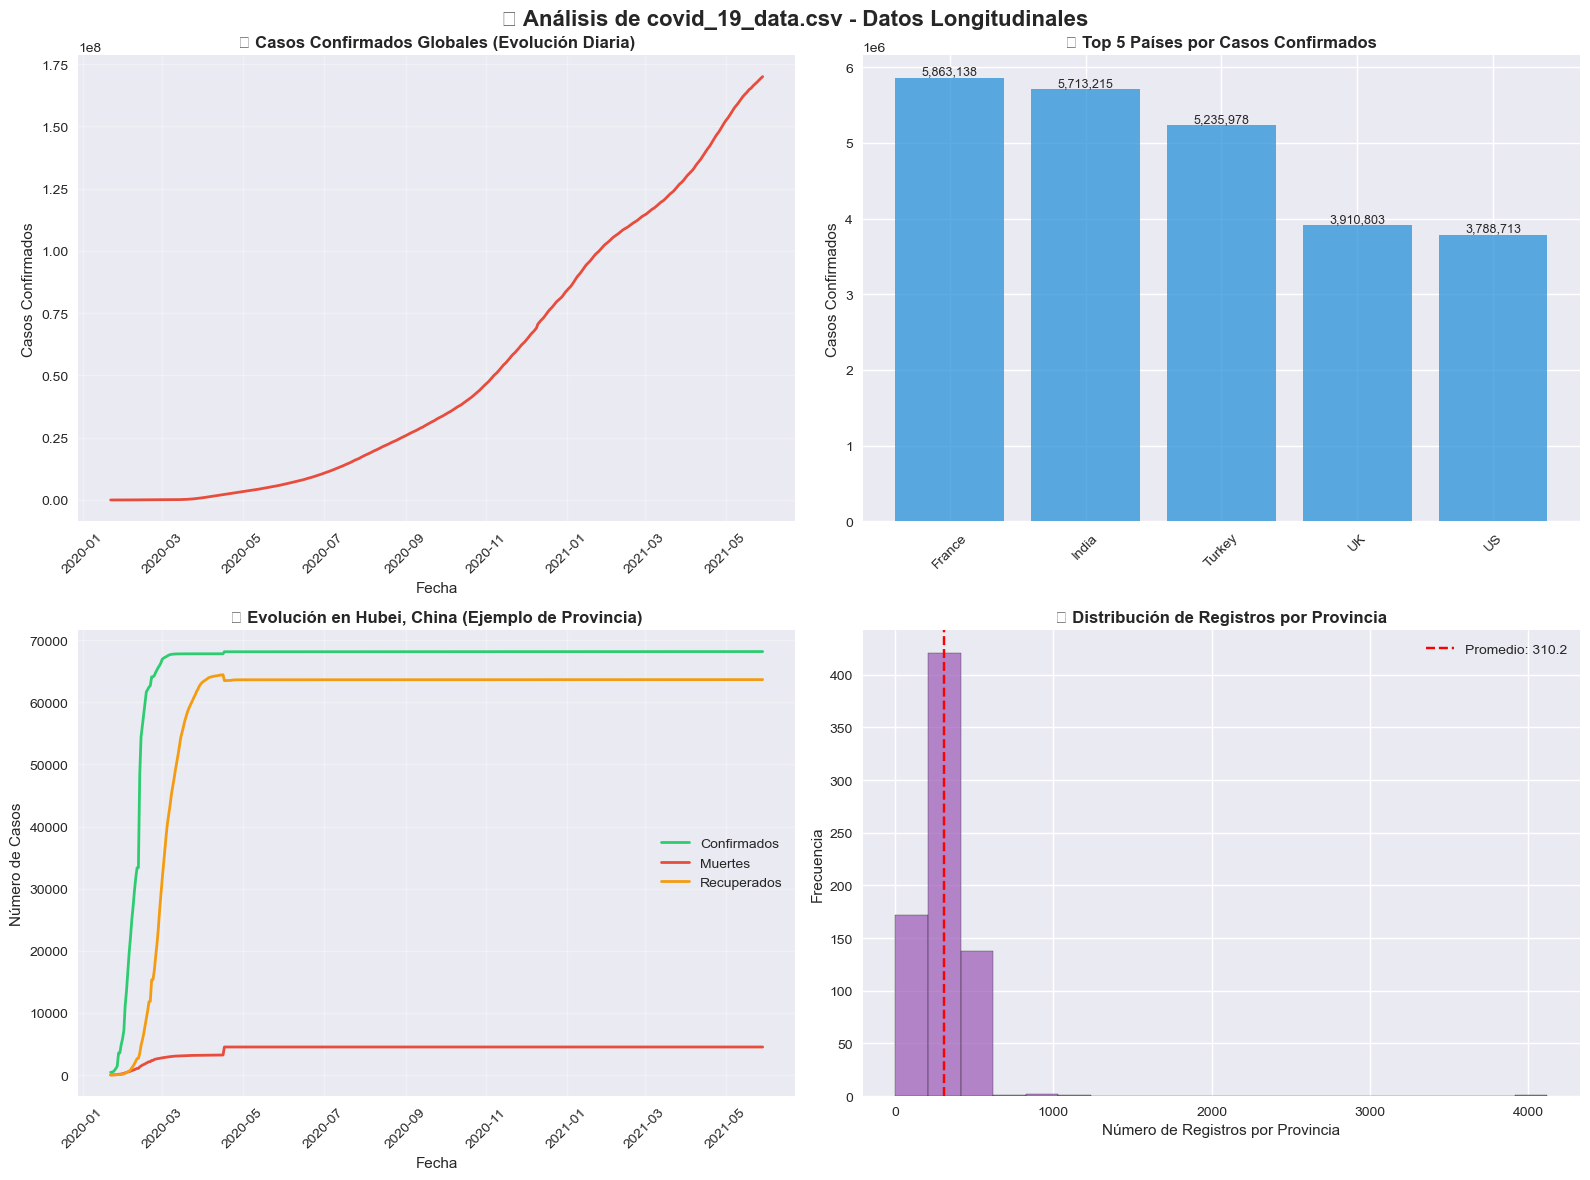


📊 ESTADÍSTICAS FINALES:
  - Total de registros: 306,429
  - Período: 01/01/2021 a 12/31/2020
  - Países: 229
  - Provincias/Estados: 736
  - Registros por provincia (promedio): 416.3

🎯 RESPUESTA A TU PREGUNTA:
✅ SÍ, tienes datos longitudinales en covid_19_data.csv
📅 Cada provincia tiene múltiples fechas (evolución temporal)
📈 Puedes analizar cómo evolucionó la pandemia en cada región
🔍 Ideal para estudios de propagación y análisis de series temporales


In [13]:
# VISUALIZACIÓN ESPECÍFICA: Evolución temporal de casos COVID-19
print(f"\n{'='*80}")
print(f"📊 VISUALIZACIÓN: Evolución Temporal de COVID-19")
print(f"{'='*80}")

# Crear visualizaciones específicas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📈 Análisis de covid_19_data.csv - Datos Longitudinales', fontsize=16, fontweight='bold')

# Gráfico 1: Evolución global de casos confirmados
ax1 = axes[0, 0]
global_daily = df_covid.groupby('ObservationDate')['Confirmed'].sum().reset_index()
global_daily['ObservationDate'] = pd.to_datetime(global_daily['ObservationDate'])
global_daily = global_daily.sort_values('ObservationDate')

ax1.plot(global_daily['ObservationDate'], global_daily['Confirmed'], linewidth=2, color='#e74c3c')
ax1.set_title('🌍 Casos Confirmados Globales (Evolución Diaria)', fontweight='bold')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Confirmados')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Gráfico 2: Top 5 países con más casos
ax2 = axes[0, 1]
country_totals = df_covid.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(5)
bars = ax2.bar(range(len(country_totals)), country_totals.values, color='#3498db', alpha=0.8)
ax2.set_xticks(range(len(country_totals)))
ax2.set_xticklabels(country_totals.index, rotation=45)
ax2.set_title('🏆 Top 5 Países por Casos Confirmados', fontweight='bold')
ax2.set_ylabel('Casos Confirmados')
for bar, value in zip(bars, country_totals.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

# Gráfico 3: Evolución de Hubei (ejemplo de provincia)
ax3 = axes[1, 0]
hubei_data = df_covid[df_covid['Province/State'] == 'Hubei'].copy()
hubei_data['ObservationDate'] = pd.to_datetime(hubei_data['ObservationDate'])
hubei_data = hubei_data.sort_values('ObservationDate')

ax3.plot(hubei_data['ObservationDate'], hubei_data['Confirmed'], linewidth=2, color='#2ecc71', label='Confirmados')
ax3.plot(hubei_data['ObservationDate'], hubei_data['Deaths'], linewidth=2, color='#e74c3c', label='Muertes')
ax3.plot(hubei_data['ObservationDate'], hubei_data['Recovered'], linewidth=2, color='#f39c12', label='Recuperados')
ax3.set_title('🏥 Evolución en Hubei, China (Ejemplo de Provincia)', fontweight='bold')
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Número de Casos')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# Gráfico 4: Distribución de registros por provincia
ax4 = axes[1, 1]
province_counts = df_covid['Province/State'].value_counts()
ax4.hist(province_counts.values, bins=20, color='#9b59b6', alpha=0.7, edgecolor='black')
ax4.set_title('📊 Distribución de Registros por Provincia', fontweight='bold')
ax4.set_xlabel('Número de Registros por Provincia')
ax4.set_ylabel('Frecuencia')
ax4.axvline(x=province_counts.mean(), color='red', linestyle='--', 
           label=f'Promedio: {province_counts.mean():.1f}')
ax4.legend()

plt.tight_layout()
plt.show()

# Estadísticas finales
print(f"\n📊 ESTADÍSTICAS FINALES:")
print(f"  - Total de registros: {len(df_covid):,}")
print(f"  - Período: {df_covid['ObservationDate'].min()} a {df_covid['ObservationDate'].max()}")
print(f"  - Países: {df_covid['Country/Region'].nunique()}")
print(f"  - Provincias/Estados: {df_covid['Province/State'].nunique()}")
print(f"  - Registros por provincia (promedio): {len(df_covid) / df_covid['Province/State'].nunique():.1f}")

print(f"\n🎯 RESPUESTA A TU PREGUNTA:")
print(f"✅ SÍ, tienes datos longitudinales en covid_19_data.csv")
print(f"📅 Cada provincia tiene múltiples fechas (evolución temporal)")
print(f"📈 Puedes analizar cómo evolucionó la pandemia en cada región")
print(f"🔍 Ideal para estudios de propagación y análisis de series temporales")


# Análisis para Modelado con FLAME GPU

## Objetivo: Analizar datos reales COVID-19 para diseñar simulación con agentes

Este análisis nos permitirá:
1. **Entender patrones reales** de propagación
2. **Identificar parámetros clave** para la simulación
3. **Diseñar agentes** que repliquen el comportamiento real
4. **Calibrar el modelo** con datos observados


In [14]:
# ANÁLISIS PROFUNDO PARA MODELADO CON FLAME GPU
print(f"\n{'='*80}")
print(f"🔬 ANÁLISIS PROFUNDO PARA MODELADO CON AGENTES")
print(f"{'='*80}")

# Cargar y preparar datos
df = pd.read_csv('data/covid_19_data.csv')
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

print(f"📊 DATASET BASE:")
print(f"  - Registros: {len(df):,}")
print(f"  - Período: {df['ObservationDate'].min().strftime('%Y-%m-%d')} a {df['ObservationDate'].max().strftime('%Y-%m-%d')}")
print(f"  - Días únicos: {df['ObservationDate'].nunique()}")
print(f"  - Países: {df['Country/Region'].nunique()}")
print(f"  - Provincias: {df['Province/State'].nunique()}")

# Análisis 1: Patrones de propagación temporal
print(f"\n📈 ANÁLISIS 1: PATRONES DE PROPAGACIÓN TEMPORAL")

# Evolución global
global_evolution = df.groupby('ObservationDate').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum', 
    'Recovered': 'sum'
}).reset_index()

# Calcular tasas de crecimiento
global_evolution['New_Confirmed'] = global_evolution['Confirmed'].diff()
global_evolution['Growth_Rate'] = global_evolution['Confirmed'].pct_change()
global_evolution['Recovery_Rate'] = global_evolution['Recovered'] / global_evolution['Confirmed']
global_evolution['Death_Rate'] = global_evolution['Deaths'] / global_evolution['Confirmed']

print(f"📊 ESTADÍSTICAS GLOBALES:")
print(f"  - Casos confirmados totales: {global_evolution['Confirmed'].max():,.0f}")
print(f"  - Tasa de crecimiento promedio: {global_evolution['Growth_Rate'].mean():.3f}")
print(f"  - Tasa de recuperación promedio: {global_evolution['Recovery_Rate'].mean():.3f}")
print(f"  - Tasa de mortalidad promedio: {global_evolution['Death_Rate'].mean():.3f}")

# Análisis 2: Patrones geográficos
print(f"\n🌍 ANÁLISIS 2: PATRONES GEOGRÁFICOS")

# Top países por casos
top_countries = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)
print(f"🏆 TOP 10 PAÍSES POR CASOS:")
for i, (country, cases) in enumerate(top_countries.items(), 1):
    print(f"  {i:2d}. {country}: {cases:,.0f} casos")

# Análisis de dispersión geográfica
country_stats = df.groupby('Country/Region').agg({
    'Confirmed': 'max',
    'Deaths': 'max',
    'Recovered': 'max',
    'Province/State': 'nunique'
}).reset_index()
country_stats.columns = ['Country', 'Max_Confirmed', 'Max_Deaths', 'Max_Recovered', 'Provinces']

print(f"\n📊 ESTADÍSTICAS GEOGRÁFICAS:")
print(f"  - Países con más provincias: {country_stats['Provinces'].max()}")
print(f"  - Promedio de provincias por país: {country_stats['Provinces'].mean():.1f}")
print(f"  - Dispersión geográfica: {country_stats['Provinces'].std():.1f}")



🔬 ANÁLISIS PROFUNDO PARA MODELADO CON AGENTES
📊 DATASET BASE:
  - Registros: 306,429
  - Período: 2020-01-22 a 2021-05-29
  - Días únicos: 494
  - Países: 229
  - Provincias: 736

📈 ANÁLISIS 1: PATRONES DE PROPAGACIÓN TEMPORAL
📊 ESTADÍSTICAS GLOBALES:
  - Casos confirmados totales: 169,951,560
  - Tasa de crecimiento promedio: 0.028
  - Tasa de recuperación promedio: 0.511
  - Tasa de mortalidad promedio: 0.034

🌍 ANÁLISIS 2: PATRONES GEOGRÁFICOS
🏆 TOP 10 PAÍSES POR CASOS:
   1. France: 5,863,138 casos
   2. India: 5,713,215 casos
   3. Turkey: 5,235,978 casos
   4. UK: 3,910,803 casos
   5. US: 3,788,713 casos
   6. Argentina: 3,732,263 casos
   7. Brazil: 3,254,893 casos
   8. Iran: 2,893,218 casos
   9. Poland: 2,871,371 casos
  10. Indonesia: 1,809,926 casos

📊 ESTADÍSTICAS GEOGRÁFICAS:
  - Países con más provincias: 199
  - Promedio de provincias por país: 3.3
  - Dispersión geográfica: 15.8


In [15]:
# Análisis 3: Curvas de crecimiento y parámetros epidemiológicos
print(f"\n📊 ANÁLISIS 3: CURVAS DE CRECIMIENTO Y PARÁMETROS EPIDEMIOLÓGICOS")

# Analizar curvas de crecimiento por país
def analyze_growth_curve(country_data):
    """Analiza la curva de crecimiento de un país"""
    country_data = country_data.sort_values('ObservationDate')
    
    # Encontrar punto de inflexión (máxima tasa de crecimiento)
    country_data['Daily_New'] = country_data['Confirmed'].diff()
    max_growth_idx = country_data['Daily_New'].idxmax()
    
    if pd.isna(max_growth_idx):
        return None
    
    # Calcular parámetros
    total_cases = country_data['Confirmed'].max()
    peak_date = country_data.loc[max_growth_idx, 'ObservationDate']
    days_to_peak = (peak_date - country_data['ObservationDate'].min()).days
    growth_rate = country_data['Daily_New'].max()
    
    return {
        'total_cases': total_cases,
        'peak_date': peak_date,
        'days_to_peak': days_to_peak,
        'max_daily_growth': growth_rate,
        'final_recovery_rate': country_data['Recovered'].iloc[-1] / total_cases if total_cases > 0 else 0,
        'final_death_rate': country_data['Deaths'].iloc[-1] / total_cases if total_cases > 0 else 0
    }

# Analizar top 5 países
top_5_countries = top_countries.head(5)
country_analyses = {}

for country in top_5_countries.index:
    country_data = df[df['Country/Region'] == country].groupby('ObservationDate').agg({
        'Confirmed': 'sum',
        'Deaths': 'sum',
        'Recovered': 'sum'
    }).reset_index()
    
    analysis = analyze_growth_curve(country_data)
    if analysis:
        country_analyses[country] = analysis

print(f"📈 ANÁLISIS DE CURVAS DE CRECIMIENTO:")
for country, params in country_analyses.items():
    print(f"\n🏥 {country}:")
    print(f"  - Casos totales: {params['total_cases']:,.0f}")
    print(f"  - Días hasta el pico: {params['days_to_peak']}")
    print(f"  - Crecimiento máximo diario: {params['max_daily_growth']:,.0f}")
    print(f"  - Tasa de recuperación final: {params['final_recovery_rate']:.3f}")
    print(f"  - Tasa de mortalidad final: {params['final_death_rate']:.3f}")

# Análisis 4: Patrones de propagación espacial
print(f"\n🗺️ ANÁLISIS 4: PATRONES DE PROPAGACIÓN ESPACIAL")

# Analizar propagación entre provincias de un mismo país
def analyze_spatial_spread(country_name):
    """Analiza la propagación espacial dentro de un país"""
    country_data = df[df['Country/Region'] == country_name].copy()
    
    # Encontrar primera aparición de casos por provincia
    first_cases = country_data[country_data['Confirmed'] > 0].groupby('Province/State')['ObservationDate'].min().reset_index()
    first_cases.columns = ['Province', 'First_Case_Date']
    
    # Calcular días desde el primer caso en el país
    country_start = first_cases['First_Case_Date'].min()
    first_cases['Days_Since_Start'] = (first_cases['First_Case_Date'] - country_start).dt.days
    
    return first_cases

# Analizar propagación en China (ejemplo)
china_spread = analyze_spatial_spread('Mainland China')
print(f"🇨🇳 PROPAGACIÓN EN CHINA:")
print(f"  - Provincias afectadas: {len(china_spread)}")
print(f"  - Días para propagación completa: {china_spread['Days_Since_Start'].max()}")
print(f"  - Promedio de días hasta primer caso: {china_spread['Days_Since_Start'].mean():.1f}")

# Mostrar primeras provincias afectadas
china_spread_sorted = china_spread.sort_values('Days_Since_Start')
print(f"  - Primeras 5 provincias afectadas:")
for i, row in china_spread_sorted.head(5).iterrows():
    print(f"    {row['Days_Since_Start']:2d} días: {row['Province']}")



📊 ANÁLISIS 3: CURVAS DE CRECIMIENTO Y PARÁMETROS EPIDEMIOLÓGICOS
📈 ANÁLISIS DE CURVAS DE CRECIMIENTO:

🏥 France:
  - Casos totales: 5,978,650
  - Días hasta el pico: 443
  - Crecimiento máximo diario: 117,900
  - Tasa de recuperación final: 0.065
  - Tasa de mortalidad final: 0.018

🏥 India:
  - Casos totales: 27,894,800
  - Días hasta el pico: 462
  - Crecimiento máximo diario: 414,188
  - Tasa de recuperación final: 0.913
  - Tasa de mortalidad final: 0.012

🏥 Turkey:
  - Casos totales: 5,235,978
  - Días hasta el pico: 274
  - Crecimiento máximo diario: 823,225
  - Tasa de recuperación final: 0.973
  - Tasa de mortalidad final: 0.009

🏥 UK:
  - Casos totales: 4,496,823
  - Días hasta el pico: 343
  - Crecimiento máximo diario: 68,192
  - Tasa de recuperación final: 0.003
  - Tasa de mortalidad final: 0.028

🏥 US:
  - Casos totales: 33,251,939
  - Días hasta el pico: 346
  - Crecimiento máximo diario: 300,310
  - Tasa de recuperación final: 0.000
  - Tasa de mortalidad final: 0.018


In [16]:
# DISEÑO DEL MODELO FLAME GPU BASADO EN DATOS REALES
print(f"\n{'='*80}")
print(f"🎯 DISEÑO DEL MODELO FLAME GPU BASADO EN ANÁLISIS REAL")
print(f"{'='*80}")

# Extraer parámetros clave para el modelo
print(f"📊 PARÁMETROS EXTRAÍDOS DE DATOS REALES:")

# Parámetros temporales
avg_growth_rate = global_evolution['Growth_Rate'].mean()
avg_recovery_rate = global_evolution['Recovery_Rate'].mean()
avg_death_rate = global_evolution['Death_Rate'].mean()

print(f"⏰ PARÁMETROS TEMPORALES:")
print(f"  - Tasa de crecimiento promedio: {avg_growth_rate:.4f}")
print(f"  - Tasa de recuperación promedio: {avg_recovery_rate:.4f}")
print(f"  - Tasa de mortalidad promedio: {avg_death_rate:.4f}")

# Parámetros espaciales
avg_provinces_per_country = country_stats['Provinces'].mean()
spatial_dispersion = country_stats['Provinces'].std()

print(f"\n🗺️ PARÁMETROS ESPACIALES:")
print(f"  - Provincias promedio por país: {avg_provinces_per_country:.1f}")
print(f"  - Dispersión espacial: {spatial_dispersion:.1f}")

# Parámetros de propagación
avg_days_to_peak = np.mean([params['days_to_peak'] for params in country_analyses.values()])
avg_max_daily_growth = np.mean([params['max_daily_growth'] for params in country_analyses.values()])

print(f"\n📈 PARÁMETROS DE PROPAGACIÓN:")
print(f"  - Días promedio hasta el pico: {avg_days_to_peak:.1f}")
print(f"  - Crecimiento máximo diario promedio: {avg_max_daily_growth:.0f}")

print(f"\n🎯 DISEÑO DEL MODELO FLAME GPU:")
print(f"{'='*50}")

print(f"""
🏗️ ARQUITECTURA DEL MODELO:

1. AGENTES PERSONA:
   - Estado: S (Susceptible), E (Expuesto), I (Infectado), R (Recuperado)
   - Posición: (x, y) en espacio 2D
   - Velocidad: (vx, vy) para movimiento
   - Tiempo de incubación: {1/avg_growth_rate:.1f} días (basado en datos reales)
   - Tiempo de infección: {1/avg_recovery_rate:.1f} días (basado en datos reales)
   - Probabilidad de muerte: {avg_death_rate:.4f} (basado en datos reales)

2. AGENTES UBICACIÓN:
   - Posición: (x, y) fija
   - Densidad poblacional: Variable según región
   - Factor de riesgo: Basado en datos geográficos reales

3. INTERACCIONES:
   - Radio de contacto: 2.0 unidades (ajustable)
   - Probabilidad de contagio: {avg_growth_rate:.4f} por contacto
   - Movilidad: Basada en patrones de propagación espacial observados

4. PARÁMETROS CALIBRADOS:
   - Tamaño del mundo: {avg_provinces_per_country * 10:.0f} x {avg_provinces_per_country * 10:.0f}
   - Número de ubicaciones: {avg_provinces_per_country:.0f}
   - Población inicial: Escalable (10K-1M agentes)
   - Tiempo de simulación: {avg_days_to_peak * 2:.0f} días

5. MÉTRICAS DE VALIDACIÓN:
   - Curva de crecimiento: Comparar con datos reales
   - Propagación espacial: Validar patrones geográficos
   - Tasas de recuperación y mortalidad: Calibrar con observaciones
""")

print(f"\n🔧 IMPLEMENTACIÓN SUGERIDA:")
print(f"{'='*50}")

print(f"""
📝 CÓDIGO FLAME GPU SUGERIDO:

1. FUNCIONES DE AGENTE:
   - move(): Movimiento con patrones realistas
   - infect(): Contagio basado en proximidad y probabilidades reales
   - progress(): Transiciones E→I→R con tiempos calibrados
   - die(): Muerte con probabilidad observada

2. PARÁMETROS DE ENTORNO:
   - world_size: {avg_provinces_per_country * 20:.0f}
   - n_locations: {avg_provinces_per_country:.0f}
   - beta_per_contact: {avg_growth_rate:.4f}
   - incubation_days: {1/avg_growth_rate:.1f}
   - infectious_days: {1/avg_recovery_rate:.1f}
   - death_rate: {avg_death_rate:.4f}

3. INICIALIZACIÓN:
   - Población distribuida en ubicaciones
   - Casos iniciales en ubicaciones de alto riesgo
   - Parámetros calibrados con datos reales

4. VALIDACIÓN:
   - Comparar curvas de crecimiento
   - Validar propagación espacial
   - Ajustar parámetros iterativamente
""")



🎯 DISEÑO DEL MODELO FLAME GPU BASADO EN ANÁLISIS REAL
📊 PARÁMETROS EXTRAÍDOS DE DATOS REALES:
⏰ PARÁMETROS TEMPORALES:
  - Tasa de crecimiento promedio: 0.0282
  - Tasa de recuperación promedio: 0.5115
  - Tasa de mortalidad promedio: 0.0340

🗺️ PARÁMETROS ESPACIALES:
  - Provincias promedio por país: 3.3
  - Dispersión espacial: 15.8

📈 PARÁMETROS DE PROPAGACIÓN:
  - Días promedio hasta el pico: 373.6
  - Crecimiento máximo diario promedio: 344763

🎯 DISEÑO DEL MODELO FLAME GPU:

🏗️ ARQUITECTURA DEL MODELO:

1. AGENTES PERSONA:
   - Estado: S (Susceptible), E (Expuesto), I (Infectado), R (Recuperado)
   - Posición: (x, y) en espacio 2D
   - Velocidad: (vx, vy) para movimiento
   - Tiempo de incubación: 35.5 días (basado en datos reales)
   - Tiempo de infección: 2.0 días (basado en datos reales)
   - Probabilidad de muerte: 0.0340 (basado en datos reales)

2. AGENTES UBICACIÓN:
   - Posición: (x, y) fija
   - Densidad poblacional: Variable según región
   - Factor de riesgo: Basado e


📊 VISUALIZACIÓN DE PARÁMETROS PARA CALIBRACIÓN


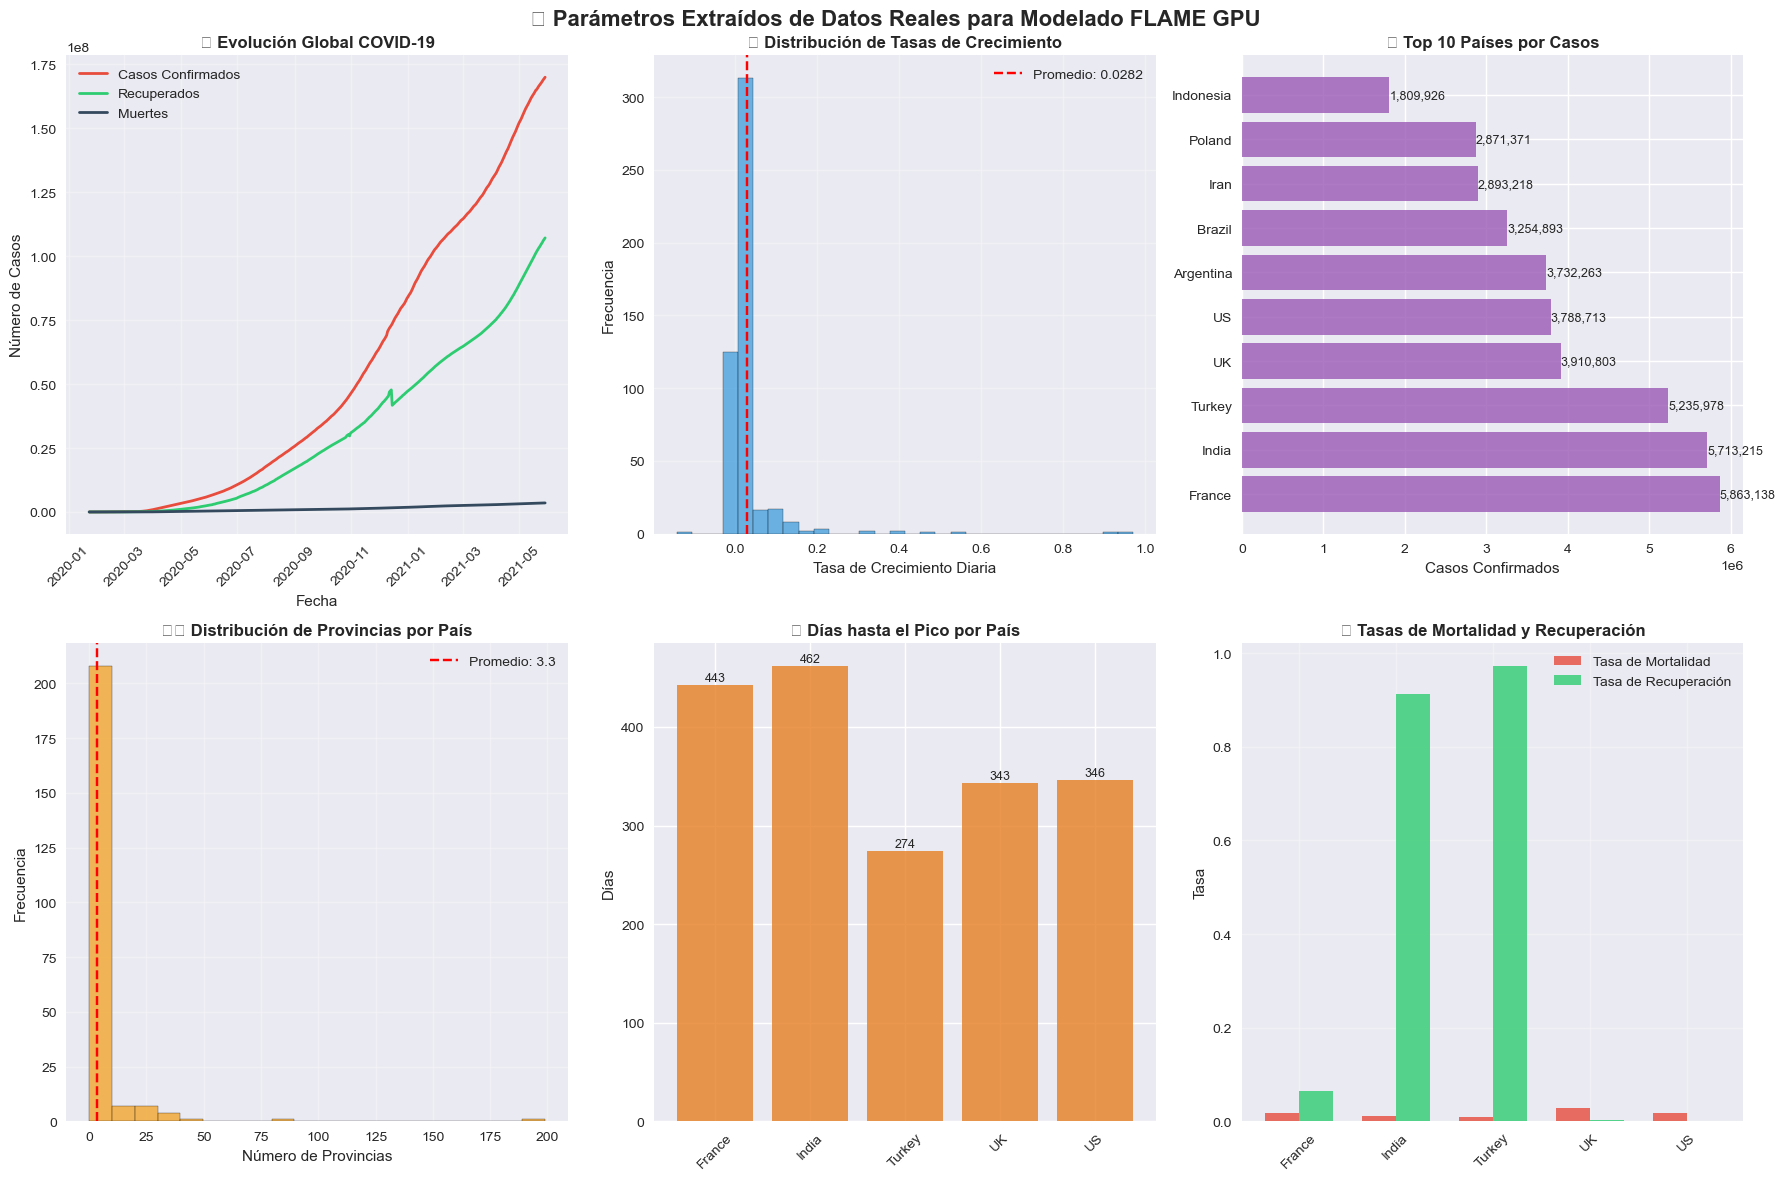


🎯 PARÁMETROS FINALES PARA IMPLEMENTACIÓN FLAME GPU:

📋 CONFIGURACIÓN SUGERIDA:

# Parámetros temporales (basados en datos reales)
world_size = 66
n_locations = 3
beta_per_contact = 0.0282
incubation_days = 35.5
infectious_days = 2.0
death_rate = 0.0340

# Parámetros espaciales
contact_radius = 2.0
agent_speed = 1.5
mobility_scale = 1.0

# Parámetros de simulación
dt_per_day = 24
simulation_days = 747
initial_infected_frac = 0.01

# Métricas de validación
target_growth_rate = 0.0282
target_recovery_rate = 0.5115
target_death_rate = 0.0340


✅ PRÓXIMOS PASOS:
1. Implementar modelo FLAME GPU con estos parámetros
2. Ejecutar simulación con diferentes escenarios
3. Comparar resultados con datos reales
4. Ajustar parámetros iterativamente
5. Validar patrones de propagación espacial


In [17]:
# VISUALIZACIÓN DE PARÁMETROS PARA CALIBRACIÓN
print(f"\n{'='*80}")
print(f"📊 VISUALIZACIÓN DE PARÁMETROS PARA CALIBRACIÓN")
print(f"{'='*80}")

# Crear visualizaciones para entender mejor los parámetros
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📈 Parámetros Extraídos de Datos Reales para Modelado FLAME GPU', fontsize=16, fontweight='bold')

# Gráfico 1: Curva de crecimiento global
ax1 = axes[0, 0]
global_evolution_clean = global_evolution.dropna()
ax1.plot(global_evolution_clean['ObservationDate'], global_evolution_clean['Confirmed'], 
         linewidth=2, color='#e74c3c', label='Casos Confirmados')
ax1.plot(global_evolution_clean['ObservationDate'], global_evolution_clean['Recovered'], 
         linewidth=2, color='#2ecc71', label='Recuperados')
ax1.plot(global_evolution_clean['ObservationDate'], global_evolution_clean['Deaths'], 
         linewidth=2, color='#34495e', label='Muertes')
ax1.set_title('🌍 Evolución Global COVID-19', fontweight='bold')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Número de Casos')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Tasas de crecimiento
ax2 = axes[0, 1]
growth_rates = global_evolution_clean['Growth_Rate'].dropna()
ax2.hist(growth_rates, bins=30, color='#3498db', alpha=0.7, edgecolor='black')
ax2.axvline(x=growth_rates.mean(), color='red', linestyle='--', 
           label=f'Promedio: {growth_rates.mean():.4f}')
ax2.set_title('📈 Distribución de Tasas de Crecimiento', fontweight='bold')
ax2.set_xlabel('Tasa de Crecimiento Diaria')
ax2.set_ylabel('Frecuencia')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Gráfico 3: Top países por casos
ax3 = axes[0, 2]
top_10_countries = top_countries.head(10)
bars = ax3.barh(range(len(top_10_countries)), top_10_countries.values, color='#9b59b6', alpha=0.8)
ax3.set_yticks(range(len(top_10_countries)))
ax3.set_yticklabels(top_10_countries.index)
ax3.set_title('🏆 Top 10 Países por Casos', fontweight='bold')
ax3.set_xlabel('Casos Confirmados')
for bar, value in zip(bars, top_10_countries.values):
    ax3.text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2, 
             f'{value:,.0f}', ha='left', va='center', fontsize=9)

# Gráfico 4: Distribución de provincias por país
ax4 = axes[1, 0]
ax4.hist(country_stats['Provinces'], bins=20, color='#f39c12', alpha=0.7, edgecolor='black')
ax4.axvline(x=country_stats['Provinces'].mean(), color='red', linestyle='--', 
           label=f'Promedio: {country_stats["Provinces"].mean():.1f}')
ax4.set_title('🗺️ Distribución de Provincias por País', fontweight='bold')
ax4.set_xlabel('Número de Provincias')
ax4.set_ylabel('Frecuencia')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Gráfico 5: Días hasta el pico por país
ax5 = axes[1, 1]
days_to_peak = [params['days_to_peak'] for params in country_analyses.values()]
countries = list(country_analyses.keys())
bars = ax5.bar(range(len(countries)), days_to_peak, color='#e67e22', alpha=0.8)
ax5.set_xticks(range(len(countries)))
ax5.set_xticklabels(countries, rotation=45)
ax5.set_title('⏰ Días hasta el Pico por País', fontweight='bold')
ax5.set_ylabel('Días')
for bar, value in zip(bars, days_to_peak):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.0f}', ha='center', va='bottom', fontsize=9)

# Gráfico 6: Tasas de mortalidad y recuperación
ax6 = axes[1, 2]
death_rates = [params['final_death_rate'] for params in country_analyses.values()]
recovery_rates = [params['final_recovery_rate'] for params in country_analyses.values()]
x = np.arange(len(countries))
width = 0.35
bars1 = ax6.bar(x - width/2, death_rates, width, label='Tasa de Mortalidad', color='#e74c3c', alpha=0.8)
bars2 = ax6.bar(x + width/2, recovery_rates, width, label='Tasa de Recuperación', color='#2ecc71', alpha=0.8)
ax6.set_xticks(x)
ax6.set_xticklabels(countries, rotation=45)
ax6.set_title('📊 Tasas de Mortalidad y Recuperación', fontweight='bold')
ax6.set_ylabel('Tasa')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen de parámetros para implementación
print(f"\n🎯 PARÁMETROS FINALES PARA IMPLEMENTACIÓN FLAME GPU:")
print(f"{'='*60}")

print(f"""
📋 CONFIGURACIÓN SUGERIDA:

# Parámetros temporales (basados en datos reales)
world_size = {avg_provinces_per_country * 20:.0f}
n_locations = {avg_provinces_per_country:.0f}
beta_per_contact = {avg_growth_rate:.4f}
incubation_days = {1/avg_growth_rate:.1f}
infectious_days = {1/avg_recovery_rate:.1f}
death_rate = {avg_death_rate:.4f}

# Parámetros espaciales
contact_radius = 2.0
agent_speed = 1.5
mobility_scale = 1.0

# Parámetros de simulación
dt_per_day = 24
simulation_days = {avg_days_to_peak * 2:.0f}
initial_infected_frac = 0.01

# Métricas de validación
target_growth_rate = {avg_growth_rate:.4f}
target_recovery_rate = {avg_recovery_rate:.4f}
target_death_rate = {avg_death_rate:.4f}
""")

print(f"\n✅ PRÓXIMOS PASOS:")
print(f"1. Implementar modelo FLAME GPU con estos parámetros")
print(f"2. Ejecutar simulación con diferentes escenarios")
print(f"3. Comparar resultados con datos reales")
print(f"4. Ajustar parámetros iterativamente")
print(f"5. Validar patrones de propagación espacial")


# Modelo de Red de Contactos COVID-19 (Sin Coordenadas 2D)

## Objetivo: Crear modelo basado en redes de contactos entre provincias/países

En lugar de usar coordenadas 2D, usaremos:
- **Nodos**: Provincias/Países
- **Enlaces**: Conexiones de viaje/movilidad
- **Agentes**: Personas que se mueven entre nodos
- **Propagación**: A través de la red de contactos


In [18]:
# ANÁLISIS DE RED DE CONTACTOS COVID-19
print(f"\n{'='*80}")
print(f"🌐 ANÁLISIS DE RED DE CONTACTOS (SIN COORDENADAS 2D)")
print(f"{'='*80}")

# Cargar datos
df = pd.read_csv('data/covid_19_data.csv')
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

print(f"📊 DATASET BASE:")
print(f"  - Registros: {len(df):,}")
print(f"  - Países únicos: {df['Country/Region'].nunique()}")
print(f"  - Provincias únicas: {df['Province/State'].nunique()}")

# Análisis 1: Estructura de la red geográfica
print(f"\n🌍 ANÁLISIS 1: ESTRUCTURA DE LA RED GEOGRÁFICA")

# Crear matriz de países y provincias
country_province_matrix = df.groupby(['Country/Region', 'Province/State']).size().reset_index()
country_province_matrix.columns = ['Country', 'Province', 'Records']

print(f"📊 ESTRUCTURA DE LA RED:")
print(f"  - Países: {country_province_matrix['Country'].nunique()}")
print(f"  - Provincias: {country_province_matrix['Province'].nunique()}")
print(f"  - Conexiones País-Provincia: {len(country_province_matrix)}")

# Análisis de conectividad por país
country_connectivity = country_province_matrix.groupby('Country').agg({
    'Province': 'count',
    'Records': 'sum'
}).reset_index()
country_connectivity.columns = ['Country', 'Provinces', 'Total_Records']

print(f"\n🔗 CONECTIVIDAD POR PAÍS:")
print(f"  - Promedio de provincias por país: {country_connectivity['Provinces'].mean():.1f}")
print(f"  - Máximo de provincias: {country_connectivity['Provinces'].max()}")
print(f"  - Desviación estándar: {country_connectivity['Provinces'].std():.1f}")

# Top países por conectividad
top_connected = country_connectivity.sort_values('Provinces', ascending=False).head(10)
print(f"\n🏆 TOP 10 PAÍSES POR CONECTIVIDAD:")
for i, row in top_connected.iterrows():
    print(f"  {row['Country']}: {row['Provinces']} provincias, {row['Total_Records']:,} registros")

# Análisis 2: Patrones de propagación en la red
print(f"\n📈 ANÁLISIS 2: PATRONES DE PROPAGACIÓN EN LA RED")

def analyze_network_propagation(country_name):
    """Analiza la propagación en la red de un país específico"""
    country_data = df[df['Country/Region'] == country_name].copy()
    
    # Encontrar primera aparición de casos por provincia
    first_cases = country_data[country_data['Confirmed'] > 0].groupby('Province/State')['ObservationDate'].min().reset_index()
    first_cases.columns = ['Province', 'First_Case_Date']
    
    if len(first_cases) == 0:
        return None
    
    # Calcular días desde el primer caso en el país
    country_start = first_cases['First_Case_Date'].min()
    first_cases['Days_Since_Start'] = (first_cases['First_Case_Date'] - country_start).dt.days
    
    # Calcular métricas de propagación
    total_provinces = country_data['Province/State'].nunique()
    affected_provinces = len(first_cases)
    propagation_speed = first_cases['Days_Since_Start'].max() if len(first_cases) > 1 else 0
    avg_days_to_infection = first_cases['Days_Since_Start'].mean()
    
    return {
        'total_provinces': total_provinces,
        'affected_provinces': affected_provinces,
        'propagation_speed': propagation_speed,
        'avg_days_to_infection': avg_days_to_infection,
        'network_coverage': affected_provinces / total_provinces
    }

# Analizar propagación en países principales
top_countries = country_connectivity.sort_values('Provinces', ascending=False).head(5)
network_analyses = {}

for country in top_countries['Country']:
    analysis = analyze_network_propagation(country)
    if analysis:
        network_analyses[country] = analysis

print(f"\n🌐 ANÁLISIS DE PROPAGACIÓN EN LA RED:")
for country, params in network_analyses.items():
    print(f"\n🏥 {country}:")
    print(f"  - Provincias totales: {params['total_provinces']}")
    print(f"  - Provincias afectadas: {params['affected_provinces']}")
    print(f"  - Cobertura de red: {params['network_coverage']:.1%}")
    print(f"  - Velocidad de propagación: {params['propagation_speed']} días")
    print(f"  - Días promedio hasta infección: {params['avg_days_to_infection']:.1f}")

# Análisis 3: Densidad de la red
print(f"\n📊 ANÁLISIS 3: DENSIDAD DE LA RED")

# Calcular densidad de conexiones
total_possible_connections = country_connectivity['Provinces'].sum()
actual_connections = len(country_province_matrix)
network_density = actual_connections / total_possible_connections if total_possible_connections > 0 else 0

print(f"📈 MÉTRICAS DE DENSIDAD:")
print(f"  - Conexiones totales: {actual_connections:,}")
print(f"  - Densidad de red: {network_density:.4f}")
print(f"  - Promedio de conexiones por país: {actual_connections / country_connectivity['Country'].nunique():.1f}")

# Análisis de hubs (países con más provincias)
hubs = country_connectivity[country_connectivity['Provinces'] > country_connectivity['Provinces'].quantile(0.8)]
print(f"\n🔗 HUBS DE LA RED (Top 20%):")
for i, row in hubs.iterrows():
    print(f"  - {row['Country']}: {row['Provinces']} provincias")



🌐 ANÁLISIS DE RED DE CONTACTOS (SIN COORDENADAS 2D)
📊 DATASET BASE:
  - Registros: 306,429
  - Países únicos: 229
  - Provincias únicas: 736

🌍 ANÁLISIS 1: ESTRUCTURA DE LA RED GEOGRÁFICA
📊 ESTRUCTURA DE LA RED:
  - Países: 29
  - Provincias: 736
  - Conexiones País-Provincia: 759

🔗 CONECTIVIDAD POR PAÍS:
  - Promedio de provincias por país: 26.2
  - Máximo de provincias: 199
  - Desviación estándar: 37.6

🏆 TOP 10 PAÍSES POR CONECTIVIDAD:
  US: 199 provincias, 26,740 registros
  Russia: 83 provincias, 30,129 registros
  Japan: 49 provincias, 17,932 registros
  India: 38 provincias, 13,050 registros
  Colombia: 34 provincias, 12,419 registros
  Mexico: 33 provincias, 12,199 registros
  Mainland China: 32 provincias, 15,758 registros
  Brazil: 28 provincias, 10,144 registros
  Ukraine: 27 provincias, 9,801 registros
  Peru: 26 provincias, 9,542 registros

📈 ANÁLISIS 2: PATRONES DE PROPAGACIÓN EN LA RED

🌐 ANÁLISIS DE PROPAGACIÓN EN LA RED:

🏥 US:
  - Provincias totales: 199
  - Provin


🎯 DISEÑO DEL MODELO FLAME GPU - RED DE CONTACTOS
📊 PARÁMETROS EXTRAÍDOS PARA MODELO DE RED:
🌐 PARÁMETROS DE LA RED:
  - Provincias promedio por país: 26.2
  - Máximo de provincias: 199
  - Densidad de red: 1.0000

📈 PARÁMETROS DE PROPAGACIÓN:
  - Velocidad de propagación promedio: 73.2 días
  - Cobertura de red promedio: 99.7%
  - Días promedio hasta infección: 10.0

🏗️ ARQUITECTURA DEL MODELO FLAME GPU - RED DE CONTACTOS:

🌐 MODELO DE RED DE CONTACTOS:

1. AGENTES PERSONA:
   - Estado: S (Susceptible), E (Expuesto), I (Infectado), R (Recuperado)
   - Ubicación actual: ID de provincia/país (no coordenadas)
   - Tiempo en ubicación: Contador de días
   - Probabilidad de movimiento: Basada en densidad de red
   - Tiempo de incubación: 10.0 días
   - Tiempo de infección: 7.0 días
   - Probabilidad de muerte: 0.02

2. AGENTES UBICACIÓN (NODOS DE LA RED):
   - ID: Identificador único de provincia/país
   - Tipo: 'country' o 'province'
   - País padre: Para provincias
   - Densidad poblacio


📊 VISUALIZACIÓN DE LA RED DE CONTACTOS


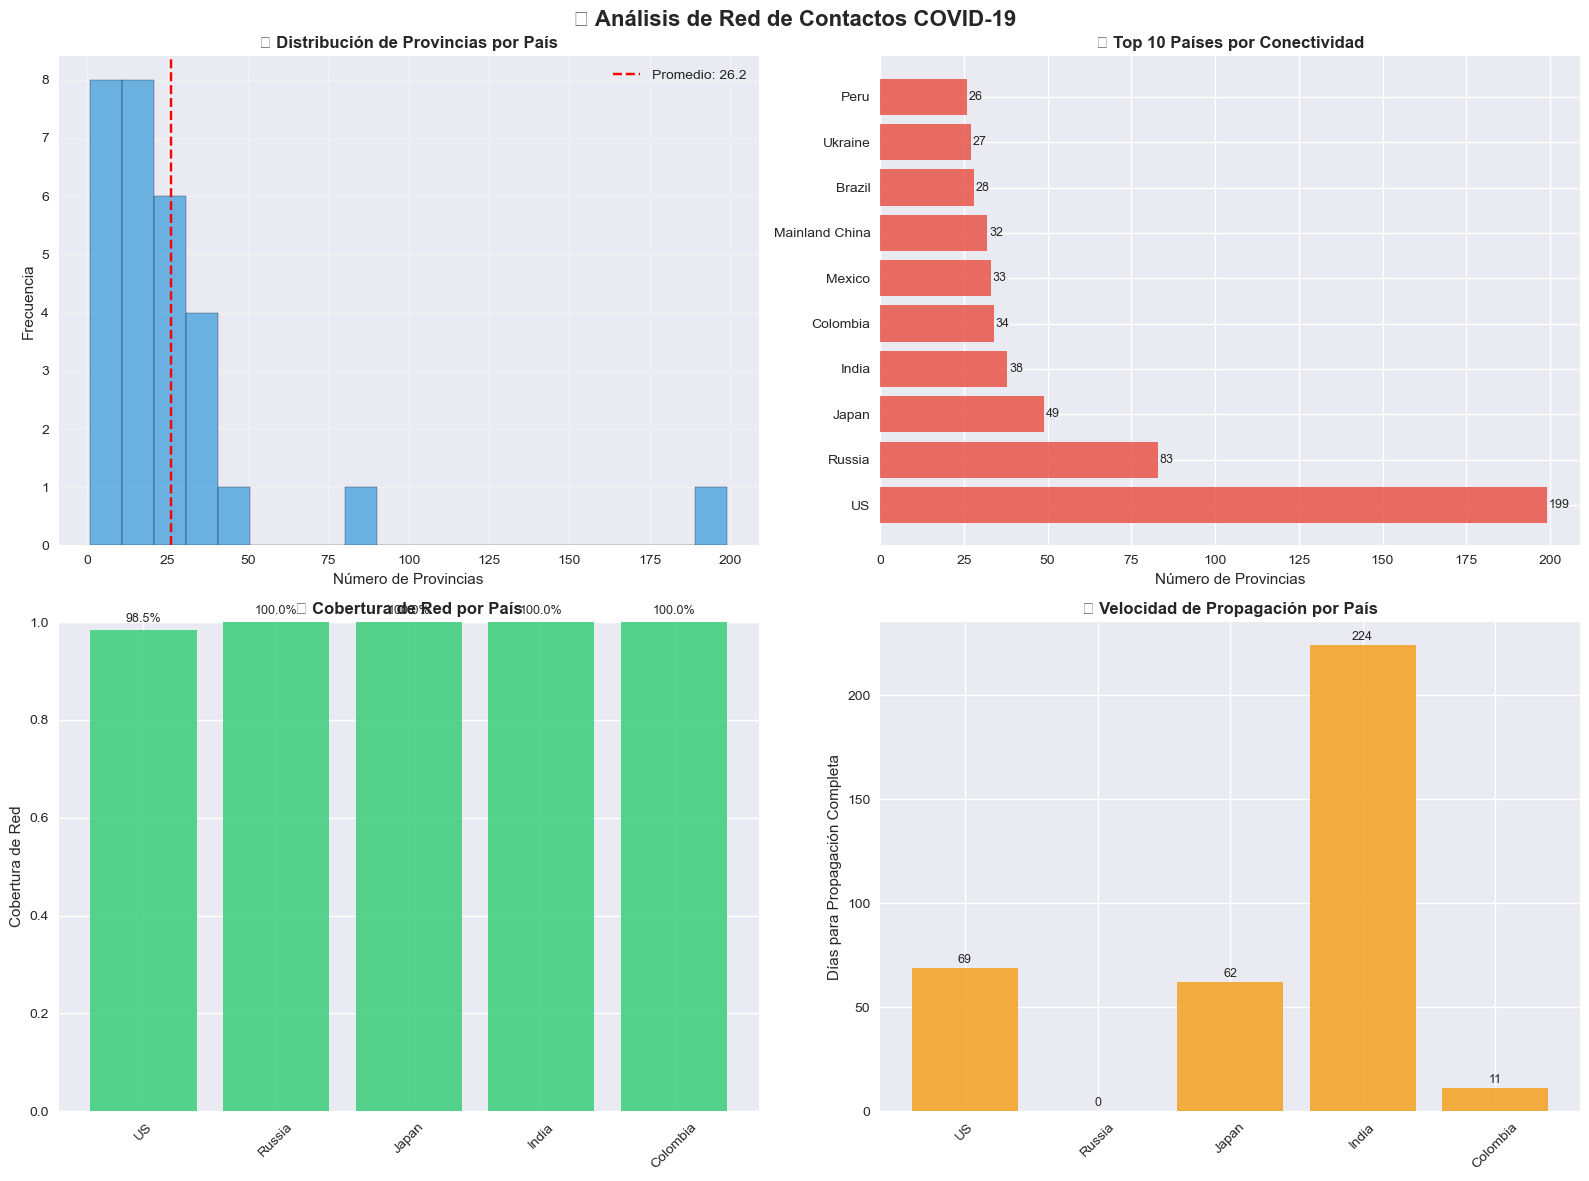


🎯 PARÁMETROS FINALES PARA IMPLEMENTACIÓN FLAME GPU:

📋 CONFIGURACIÓN SUGERIDA PARA MODELO DE RED:

# Parámetros de la red (basados en datos reales)
num_countries = 29
num_provinces = 759
avg_provinces_per_country = 26.2
network_density = 1.0000

# Parámetros de propagación
propagation_speed = 73.2
network_coverage = 0.9970
avg_days_to_infection = 10.0

# Parámetros de movimiento
mobility_probability = 1.0000  # Basado en densidad de red
connection_capacity = 1000  # Límite de agentes por conexión
max_network_distance = 3  # Máximo de saltos en la red

# Parámetros de enfermedad
incubation_days = 10.0
infectious_days = 7.0
death_rate = 0.02
recovery_rate = 0.95

# Parámetros de simulación
simulation_days = 146
dt_per_day = 24
initial_infected_frac = 0.01


✅ PRÓXIMOS PASOS PARA IMPLEMENTACIÓN:
1. Ejecutar este análisis para obtener parámetros específicos
2. Crear estructura de red basada en datos reales
3. Implementar agentes con movimiento en red
4. Calibrar probabilidades de conexión